# Homework week 7 - Paolo Zinesi

### Outline:
1. Analytical solution of the saddle point approximation for $P_>(t)$ (see calculations on the attached PDF file)
2. Simulation of $N=100$ heterogeneous Poisson processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simulation of heterogeneous Poisson processes

Create a time series $\lambda (t)$, with $t=1,2,\dots,T$ where at each time t, the value of $\lambda$ is extracted from an exponential distribution. Then simulate $N=100$ independent heterogeneous Poisson processes, where each one describes the spikes events of a single neuron, but all have the same time dependent rate parameter $\lambda(t)$.

In [2]:
# generation of time series \lambda(t)
T_ = 500
scale_lambda = 0.5 # the bigger the scale parameter, the larger the distribution of lambdas
lambda_series = np.random.exponential(scale=scale_lambda, size=T_)
max_lambda = np.max(lambda_series)

# number of neurons to simulate
N_neurons = 100

Text(0, 0.5, '$\\lambda(t)$')

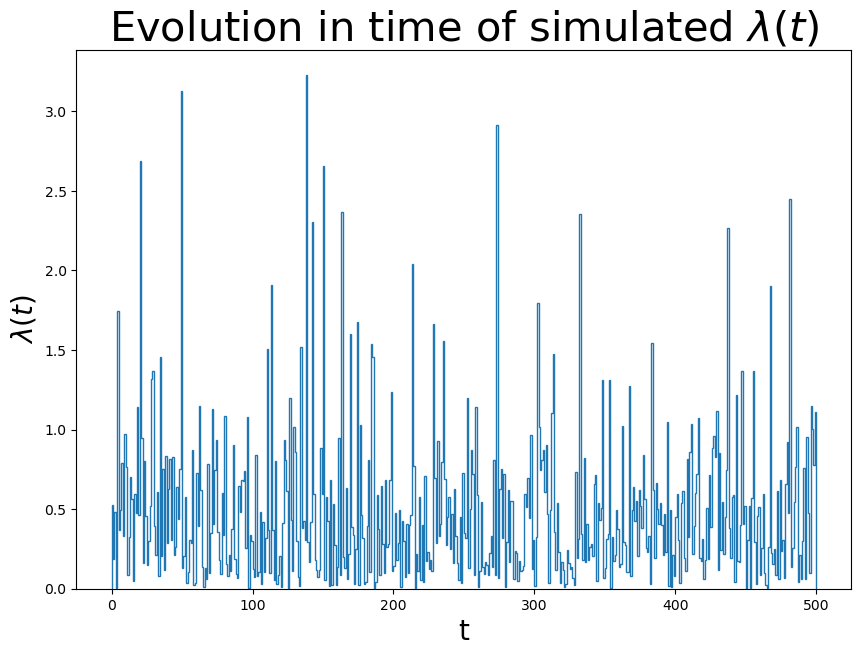

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot of time-dependent rate \lambda(t)
ax.stairs(edges=range(T_+1), values=lambda_series)

ax.set_title("Evolution in time of simulated $\lambda(t)$", fontsize=30)
ax.set_xlabel("t", fontsize=20)
ax.set_ylabel("$\lambda(t)$", fontsize=20)

The simulation of the inhomogeneous Poisson process is performed using the **thinning** technique. The events are generated with constant rate

$$\Lambda = \max_{t\in[0,T]} \lambda(t),$$

and they are subsequently selected according to the probability $\lambda(t)/\Lambda \in [0,1]$.

In [4]:
# number of events to simulate for each neuron
# (which is stochastic and follows a Poisson distribution with mean=\lambda*T)
N_events_total = np.random.poisson(lam=T_*max_lambda, size=N_neurons)
N_events_total

array([1575, 1674, 1621, 1616, 1625, 1644, 1664, 1644, 1537, 1631, 1610,
       1573, 1557, 1602, 1594, 1669, 1605, 1603, 1639, 1636, 1548, 1558,
       1642, 1566, 1570, 1619, 1653, 1590, 1571, 1617, 1675, 1602, 1647,
       1657, 1683, 1561, 1641, 1542, 1666, 1634, 1681, 1620, 1614, 1708,
       1563, 1583, 1617, 1652, 1564, 1633, 1592, 1618, 1613, 1607, 1608,
       1630, 1581, 1614, 1501, 1639, 1602, 1541, 1582, 1641, 1603, 1559,
       1648, 1646, 1612, 1592, 1599, 1644, 1562, 1646, 1602, 1615, 1593,
       1629, 1671, 1618, 1547, 1564, 1579, 1608, 1555, 1589, 1602, 1610,
       1571, 1625, 1565, 1568, 1681, 1688, 1599, 1682, 1616, 1634, 1604,
       1573])

In [5]:
spikes = []

# generate spikes for each neuron
for i in range(N_neurons):

    # generate time points of spikes with uniform rate and associate the true rate \lambda(t) at that point
    spikes_i = np.random.uniform(low=0.0, high=T_, size=N_events_total[i])
    lambda_i = lambda_series[spikes_i.astype(int)]

    # thinning procedure (remove the simulated points if thinning_mask = True)
    thinning_prob = 1 - (lambda_i/max_lambda)
    thinning_mask = np.random.uniform(low=0.0, high=1.0, size=N_events_total[i]) < thinning_prob
    spikes.append(spikes_i[~thinning_mask])
    

In [6]:
# events selected after thinning
N_events_thinned = np.array([len(x) for x in spikes])
N_events_thinned

array([240, 242, 251, 253, 252, 224, 249, 271, 245, 222, 249, 262, 211,
       248, 231, 250, 245, 256, 256, 195, 243, 239, 263, 240, 222, 244,
       238, 231, 253, 261, 238, 214, 248, 240, 234, 218, 233, 224, 262,
       235, 263, 241, 244, 275, 258, 216, 266, 236, 238, 250, 248, 243,
       226, 239, 239, 250, 232, 252, 218, 212, 236, 242, 245, 237, 265,
       240, 240, 236, 251, 238, 263, 244, 249, 240, 213, 245, 224, 276,
       272, 244, 270, 245, 256, 237, 225, 240, 235, 221, 222, 237, 252,
       255, 227, 285, 235, 255, 246, 263, 241, 232])

Text(0, 0.5, 'Neuron')

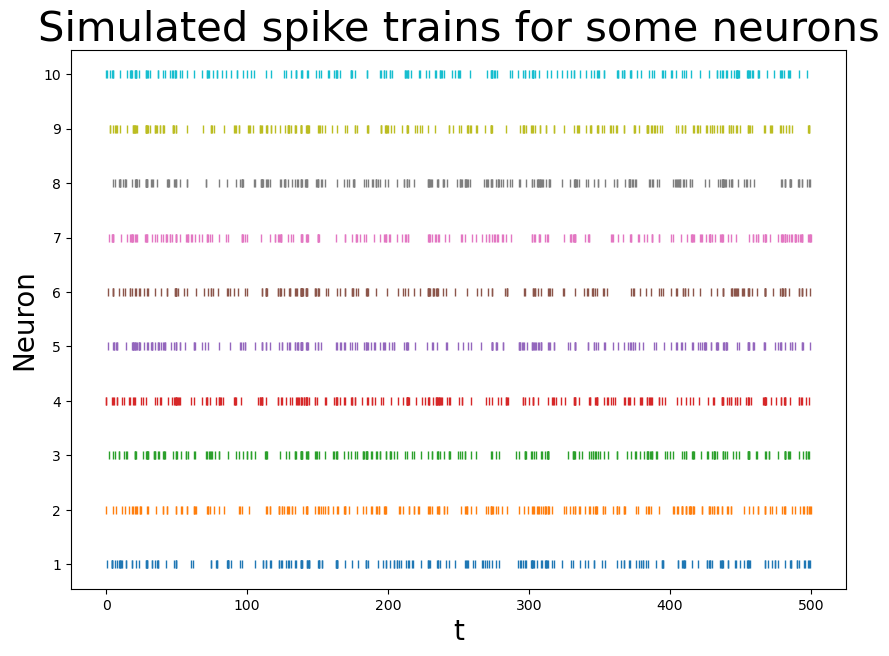

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot some spike trains
for i in range(10):
    ax.plot(spikes[i], [i+1]*len(spikes[i]), "|")

ax.set_title("Simulated spike trains for some neurons", fontsize=30)
ax.set_yticks(range(1,11))
ax.set_xlabel("t", fontsize=20)
ax.set_ylabel("Neuron", fontsize=20)

## Estimation of avalanche duration probability $P_>(t)$

In [8]:
# discretization of t axis
t_axis, dt_axis = np.linspace(start=0, stop=T_, num=1000, retstep=True)
print(f"dt = {dt_axis}")

# bins with spikes
spike_bins = np.zeros(shape=len(t_axis), dtype=int)

dt = 0.5005005005005005


In [9]:
# rectangular window indicator function
# dx is the bin width
def w_rect(x, dx=1.0):
    return np.where(np.abs(x)<=dx/2.0, 1, 0)

In [10]:
# computation of spike bins for each neuron
for i in range(N_neurons):
    spike_bin_i = np.sum(w_rect(t_axis - spikes[i].reshape(-1,1), dt_axis), axis=0)
    spike_bins = spike_bins + spike_bin_i

In [11]:
# find indices where there is no spike
zerospike_idxs = np.argwhere(spike_bins==0).reshape(-1)

# compute avalanches lengths
avalanches_length = (zerospike_idxs[1:] - zerospike_idxs[:-1]) - 1
avalanches_length = avalanches_length[avalanches_length>0]
max_avalanche_length = np.max(avalanches_length)

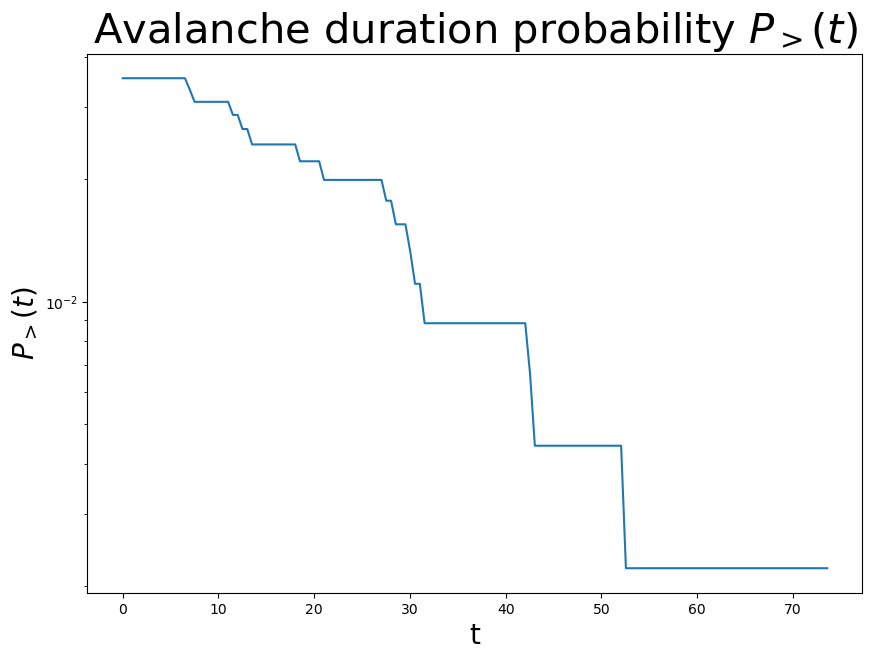

In [12]:
# compute avalanche duration P>(t)
avalanches_prob = np.sum((avalanches_length > np.arange(max_avalanche_length).reshape(-1,1)), axis=1)
avalanches_prob = avalanches_prob / (np.sum(avalanches_prob)*dt_axis)

# plot the distribution P>(t)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.plot(np.arange(max_avalanche_length)*dt_axis, avalanches_prob)

ax.set_title("Avalanche duration probability $P_>(t)$", fontsize=30)
ax.set_xlabel("t", fontsize=20)
ax.set_ylabel("$P_>(t)$", fontsize=20)
ax.set_yscale("log")

## Reconstruction of firing rates from the spike train

In [13]:
# discretization of t axis
t_axis, dt_axis = np.linspace(start=0, stop=T_, num=1000, retstep=True)

# convolutional sliding to find firing rate of each neuron
firing_rate = np.zeros(shape=(1,len(t_axis)))

In [14]:
# convolution kernel (linear*exponential)
# x_max is the point of maximum of the kernel function
def w_kernel_exp(x, x_max=1.0):
    return np.where(x>=0, (x/x_max)*np.exp(-x/x_max), 0.0)

In [15]:
# computation of firing rates for each neuron
for i in range(N_neurons):
    fire_t = np.sum(w_kernel_exp(t_axis - spikes[i].reshape(-1,1), x_max=2*dt_axis), axis=0)
    firing_rate = np.concatenate((firing_rate, fire_t.reshape(1,-1)), axis=0)

firing_rate = firing_rate[1:,:]

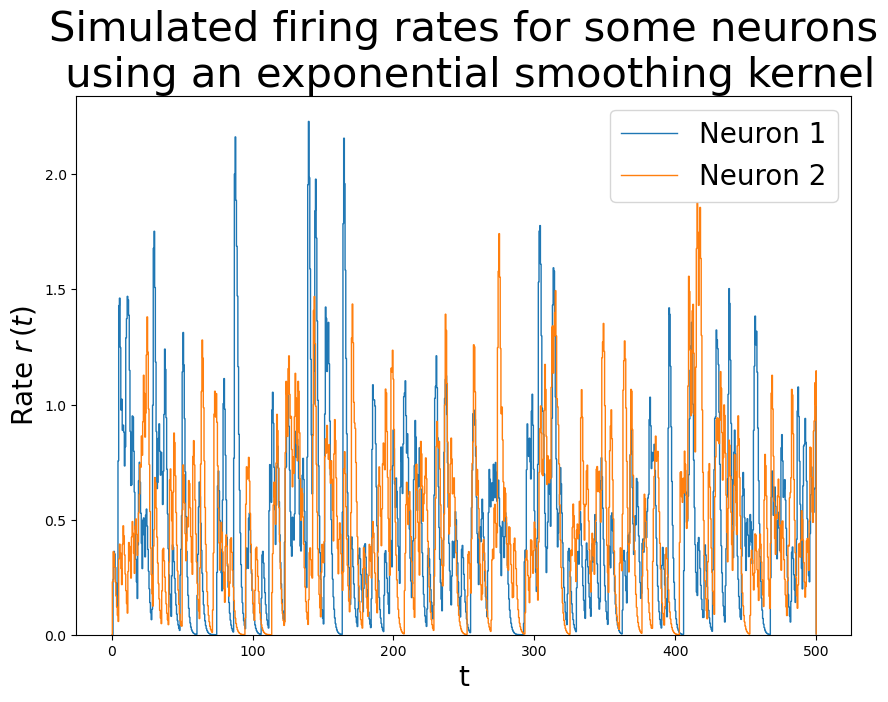

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot some smoothed firing rates
for i in range(2):
    ax.stairs(edges=np.concatenate((t_axis,[T_])), values=firing_rate[i,:], label=f"Neuron {i+1}")

ax.set_title("Simulated firing rates for some neurons\n using an exponential smoothing kernel", fontsize=30)
ax.set_xlabel("t", fontsize=20)
ax.set_ylabel("Rate $r\,(t)$", fontsize=20)
ax.legend(fontsize=20)

From the above plot we can recognize the original $\lambda(t)$ distribution, except for some expected stochasticity and for the broadening effect of the exponential smoothing kernel.